<a href="https://colab.research.google.com/github/RoniAguilar/Tareas_EstadisticaAplicada_17/blob/main/VVAO_1855188_EstadisticaAplicadaG51parcial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PARCIAL 1
EJERCICIO 3 - **BIMBO**

**Estadística Aplicada**

**Nombre:** Verónica Vanessa Aguilar Ortiz

**Matricula:** 1855188

**Grupo:** 051

In [23]:
pip install yfinance

In [4]:
import numpy as np
import pandas as pd 
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
bimbo = yf.download('BIMBOA.MX', 
                       start='2014-01-01', 
                       end='2017-12-31',
                       progress=False)

In [6]:
bimbo.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,40.000000,40.349998,38.689999,38.959999,36.355865,1465370
2014-01-03,39.000000,39.029999,38.110001,38.590000,36.010590,2105746
2014-01-06,38.599998,39.180000,38.500000,38.630001,36.047920,1915302
2014-01-07,38.500000,38.730000,38.020000,38.189999,35.637329,2398347
2014-01-08,38.009998,38.330002,37.000000,37.049999,34.573532,5156475


In [7]:
bimbo.rename(columns = {'Adj Close':'adj_close'}, inplace=True)
bimbo['retorno_simple'] = bimbo.adj_close.pct_change()

In [8]:
print('Rango de fechas:', min(bimbo.index.date), '-', max(bimbo.index.date))
print('Numero de observaciones:', bimbo.shape[0])
print(f'Media: {bimbo.retorno_simple.mean():.4f}')
print(f'Mediana: {bimbo.retorno_simple.median():.4f}')
print(f'Mínimo: {bimbo.retorno_simple.min():.4f}')
print(f'Máximo: {bimbo.retorno_simple.max():.4f}')
print(f'Desviación Estándar: {bimbo.retorno_simple.std():.4f}')
print(f'Skewness (símetría): {bimbo.retorno_simple.skew():.4f}') 
print(f'Kurtosis: {bimbo.retorno_simple.kurtosis():.4f}')    


Rango de fechas: 2014-01-02 - 2017-12-29
Numero de observaciones: 1005
Media: 0.0002
Mediana: -0.0004
Mínimo: -0.0462
Máximo: 0.0785
Desviación Estándar: 0.0151
Skewness (símetría): 0.4274
Kurtosis: 1.4128


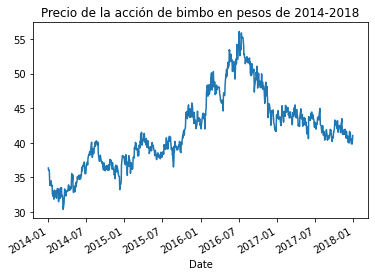

In [9]:
#Precio de la Acción
bimbo['adj_close'].plot()
plt.title('Precio de la acción de bimbo en pesos de 2014-2018')
plt.show()

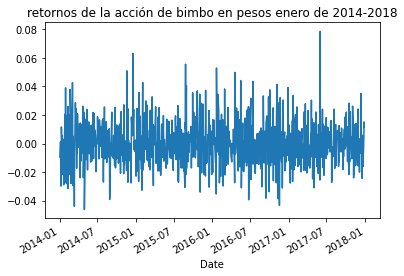

In [11]:
#Retornos de la acción
bimbo['retorno_simple'].plot()
plt.title('retornos de la acción de bimbo en pesos enero de 2014-2018')
plt.show()  

In [12]:
#Promedio movil de la acción a 10 días y a 50 días
bimbo['MA10'] = bimbo['adj_close'].rolling(10).mean()
bimbo['MA50'] = bimbo['adj_close'].rolling(50).mean()
bimbo = bimbo.dropna()
bimbo.head()

,Open,High,Low,Close,adj_close,Volume,retorno_simple,MA10,MA50
Date,,,,,,,,,
2014-03-13,34.330002,34.880001,32.619999,32.820000,30.626266,2491684,-0.043985,32.445926,33.113321
2014-03-14,32.820000,33.209999,32.459999,32.529999,30.355650,5167470,-0.008836,32.238765,32.993317
2014-03-18,32.700001,33.840000,32.700001,33.459999,31.223486,2145590,0.028589,32.145449,32.897575
2014-03-19,33.880001,34.700001,33.599998,34.189999,31.904688,2245779,0.021817,31.983078,32.814710
2014-03-20,34.419998,35.340000,33.509998,34.860001,32.529911,2571913,0.019597,31.906559,32.752562


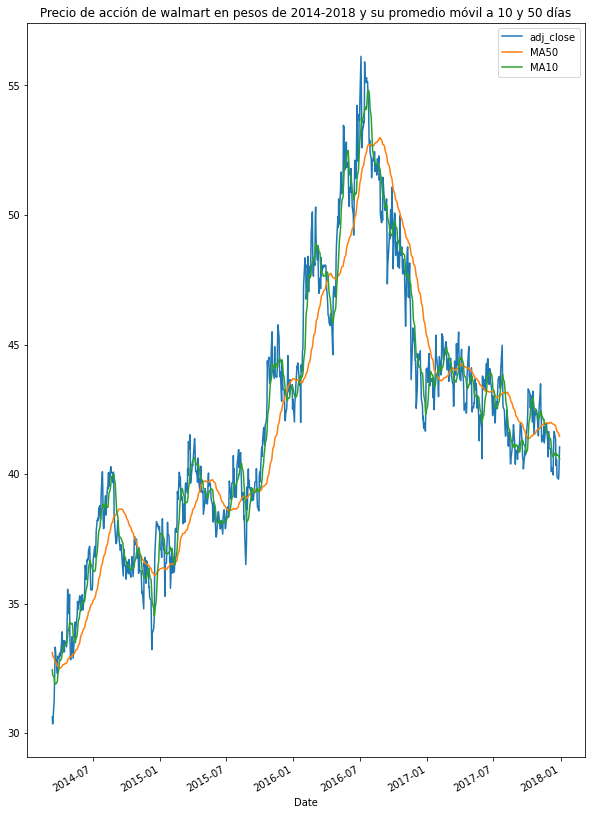

In [15]:
#Grafica del precio de la acción a 10 días y a 50 días
bimbo[['adj_close', 'MA50', 'MA10']].plot(figsize=(10,15))
plt.title('Precio de acción de walmart en pesos de 2014-2018 y su promedio móvil a 10 y 50 días')
plt.show()

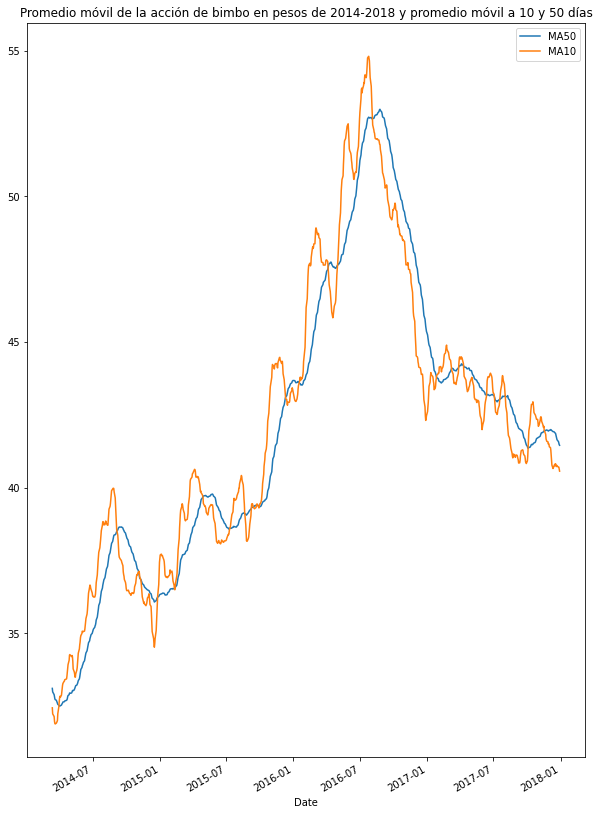

In [17]:
#Grafica del promedio movil de la acción a 10 días y a 50 días
bimbo[[ 'MA50', 'MA10']].plot(figsize=(10,15))
plt.title('Promedio móvil de la acción de bimbo en pesos de 2014-2018 y promedio móvil a 10 y 50 días')
plt.show()

In [18]:
bimbo['Shares'] = [1 if bimbo.loc[ei, 'MA10']>bimbo.loc[ei, 'MA50']
                   
                    else 0 
                   
                    for ei in bimbo.index]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


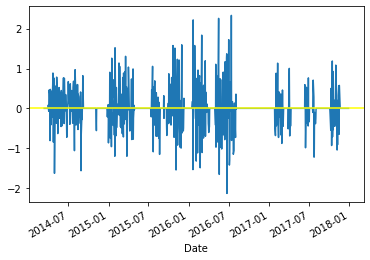

In [20]:
bimbo['close_ayer'] = bimbo['adj_close'].shift(-1)
bimbo['Profit'] = [bimbo.loc[ei, 'close_ayer'] - bimbo.loc[ei, 'adj_close'] if bimbo.loc[ei, 'Shares']==1 else 0 for ei in bimbo.index]
bimbo['Profit'].plot()
plt.axhline(y=0, color='yellow')
plt.show()

In [21]:
bimbo['ganancia_acumulada'] = bimbo['Profit'].cumsum()
bimbo.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,adj_close,Volume,retorno_simple,MA10,MA50,Shares,close_ayer,Profit,ganancia_acumulada
Date,,,,,,,,,,,,,
2017-12-22,43.000000,43.240002,42.200001,42.279999,39.888275,1345633,-0.016287,40.748687,41.647023,0,39.803371,0.0,0.304665
2017-12-26,42.209999,42.840000,42.029999,42.189999,39.803371,477677,-0.002129,40.705290,41.582115,0,39.982624,0.0,0.304665
2017-12-27,42.220001,42.770000,42.150002,42.380001,39.982624,1690897,0.004503,40.707177,41.524566,0,40.586418,0.0,0.304665
2017-12-28,42.459999,43.430000,42.459999,43.020000,40.586418,1153146,0.015101,40.628873,41.477394,0,41.048695,0.0,0.304665
2017-12-29,43.119999,43.590000,42.560001,43.509998,41.048695,2163537,0.011390,40.569436,41.458148,0,NaN,0.0,0.304665


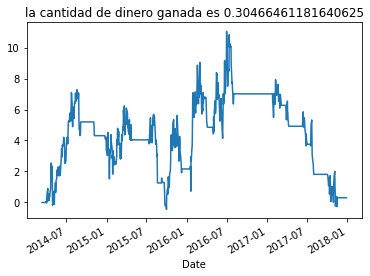

In [22]:
#Grafica de la ganacia acumulada del periodo

bimbo['ganancia_acumulada'].plot()
plt.title('la cantidad de dinero ganada es {}'.format(bimbo.loc[bimbo.index[-2], 'ganancia_acumulada']))
plt.show()

**Puedes plantear y calcular las ganancias de una estrategia de inversión alterntiva? Por ejemplo, si la acción cae más de 5% en un día la vendemos, en otro caso la comparamos o mantenemos.**

Comprar una accion, no aplicar ninguna metodologia los primeros " n " meses. Una vez pasados esos meses, aplicar la metodologia que se realizo, pero variando los porcentajes dependiendo la varianza de los datos. 
Aplicando un pronostico de series de tiempo para predecir la varianza y los porcentajes a utilizar.



**Cuales son sus desventajas y desventajas, y suena razonable la estrategia que te planteo?**

Las desventajas de esa estrategia es que si al comprar la accion, y el precio baja al mismo dia de comprarla. Lo que tendriamos que hacer seria venderla y solo perderiamos nuestro dinero. Pero una ventaja de ella, es que cuando tenemos una tendencia alcista, nos permite sseguir con nuestra accion hasta llegar a un pico local. Una vez termine ese pico, podriamos venderla a buen precio aunque no al precio optimo.

La estrategia planetada es buena, teniendo en cuenta que desde el pico ha tenido una tendencia baja, ademas de que, como estan en precios bajos actuales.Cuando exista un pico, esa estrategia seria la ideal.

Analizando el retorno de la acción esta tiene asimetria positiva, o sea asimetria a la derecha, la curtosis nos dice que es una normal leptocurtica (lo cual no representaria ningun problema a la hora de hacer calculos).




